In [54]:
import sys, os
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

root_path = Path.cwd() / "qa" / "mt"
print(f"{root_path=}")
sys.path.append(str(root_path))
env_path = root_path / "src" / "config" / ".env"
print(f"Loaded env:{load_dotenv(dotenv_path=env_path)}")
print(f"{os.environ.get('HF_HOME')=}")

from src.config.configs import get_config
from src.lib.data_tools.read_file import process_jsonl_to_df
from src.lib.data_tools.visualization import hist_value_counts, count_tokens, calc_hist_bins

config = get_config("config1")

root_path=PosixPath('/mnt/storage_2/scratch/pl0145-01/jsmok/qa/mt')
Loaded env:True
os.environ.get('HF_HOME')='/mnt/storage_2/scratch/pl0145-01/jsmok/cache/hf_home'


In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
test_df = pd.read_csv("/mnt/storage_3/home/jedrzejsmok/pl0145-01/scratch/jsmok/qa/mt/data/ipipan-polqa/test.csv")
relevant_test_df = test_df[test_df["relevant"]]
non_relevant_test_df = test_df[~test_df["relevant"]]
print(f"{len(relevant_test_df)=}, {len(non_relevant_test_df)=}")
relevant_test_df.head()

len(relevant_test_df)=6610, len(non_relevant_test_df)=7119


,question_id,passage_title,passage_text,passage_wiki,passage_id,duplicate,question,relevant,annotated_by,answers,question_formulation,question_type,entity_type,entity_subtype,split,passage_source
0,3503,Język akadyjski,"Przymiotnik. Przymiotniki, podobnie jak w języ...","Przymiotnik. Przymiotniki, podobnie jak w języ...",15630-9,False,Czy przymiotniki odmienia się przez przypadki?,True,Piotr,['tak'],QUESTION,YES/NO,YES/NO,-,test,zero-shot
1,3503,Imiesłów,"Ma on natomiast dystrybucję taką, jak przymiot...","Ma on natomiast dystrybucję taką, jak przymiot...",13005-2,False,Czy przymiotniki odmienia się przez przypadki?,True,Piotr,['tak'],QUESTION,YES/NO,YES/NO,-,test,human
2,3503,Gramatyka języka polskiego,"Przymiotnik – odmienia się przez przypadki, li...","Przymiotnik – odmienia się przez przypadki, li...",1390772-25,False,Czy przymiotniki odmienia się przez przypadki?,True,Piotr,['tak'],QUESTION,YES/NO,YES/NO,-,test,zero-shot
3,3503,Imiesłów przymiotnikowy czynny,Podobnie jak przymiotnik odmienia się przez li...,Imiesłów przymiotnikowy czynny – nieosobowa fo...,13015-0,False,Czy przymiotniki odmienia się przez przypadki?,True,Piotr,['tak'],QUESTION,YES/NO,YES/NO,-,test,human
6,3503,Przypadek,"Przypadek – kategoria gramatyczna, przez którą...","Przypadek – kategoria gramatyczna, przez którą...",13012-0,False,Czy przymiotniki odmienia się przez przypadki?,True,Piotr,['tak'],QUESTION,YES/NO,YES/NO,-,test,human


100%|██████████| 6610/6610 [00:01<00:00, 3679.62it/s]


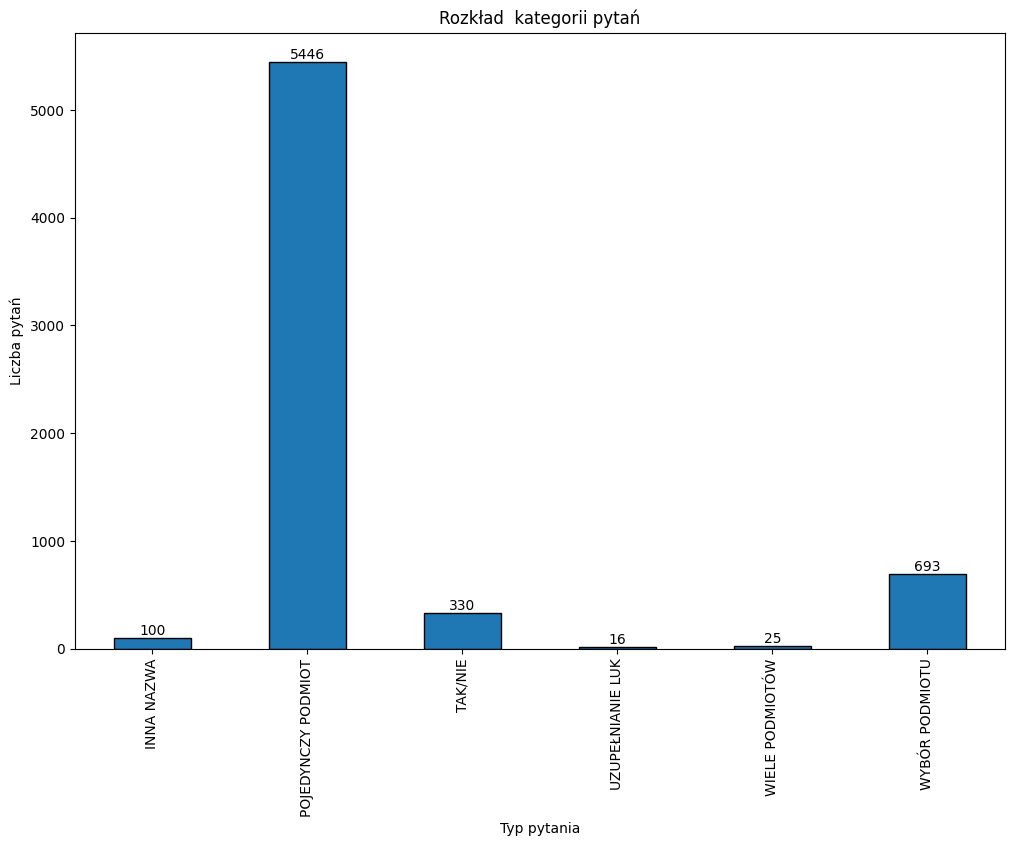

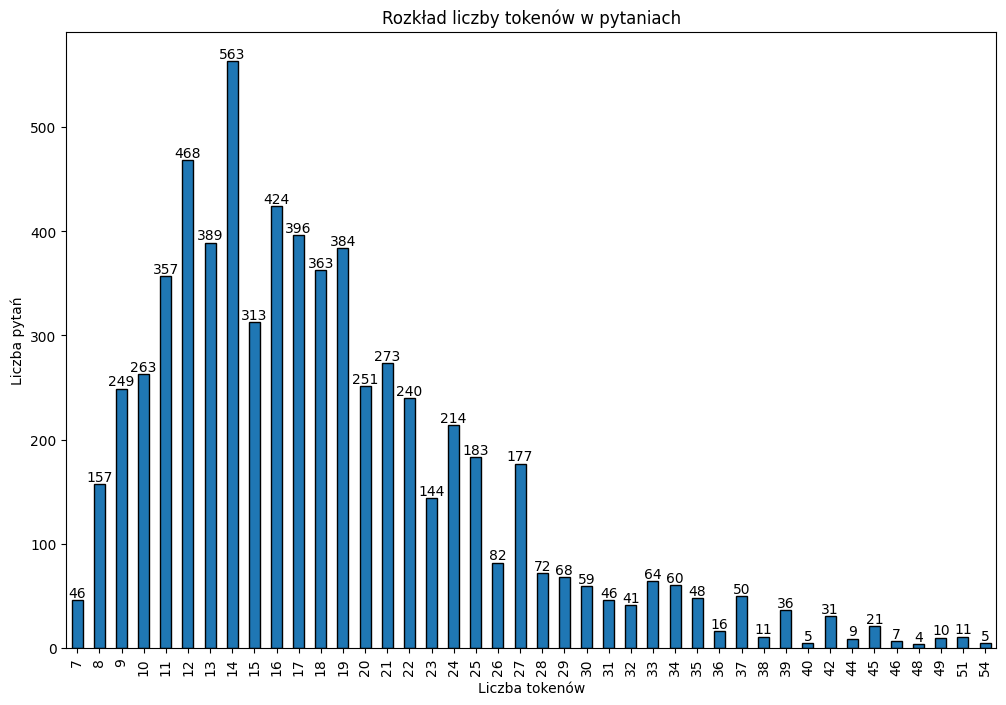

In [74]:
count_tokens(relevant_test_df, config=config)
translation_map = {
    "SINGLE ENTITY": "POJEDYNCZY PODMIOT",
    "ENTITY CHOICE": "WYBÓR PODMIOTU",
    "YES/NO": "TAK/NIE",
    "OTHER NAME": "INNA NAZWA",
    "MULTIPLE ENTITIES": "WIELE PODMIOTÓW",
    "GAP FILLING": "UZUPEŁNIANIE LUK"
}
hist_value_counts(relevant_test_df["question_type"], title="Rozkład  kategorii pytań", xlabel="Typ pytania", ylabel="Liczba pytań", save_path=root_path / "resources" / "question_type.png", translation_map=translation_map)
hist_value_counts(relevant_test_df["question_token_count"], title="Rozkład liczby tokenów w pytaniach", xlabel="Liczba tokenów", ylabel="Liczba pytań", save_path=root_path / "resources" / "question_token_count.png")

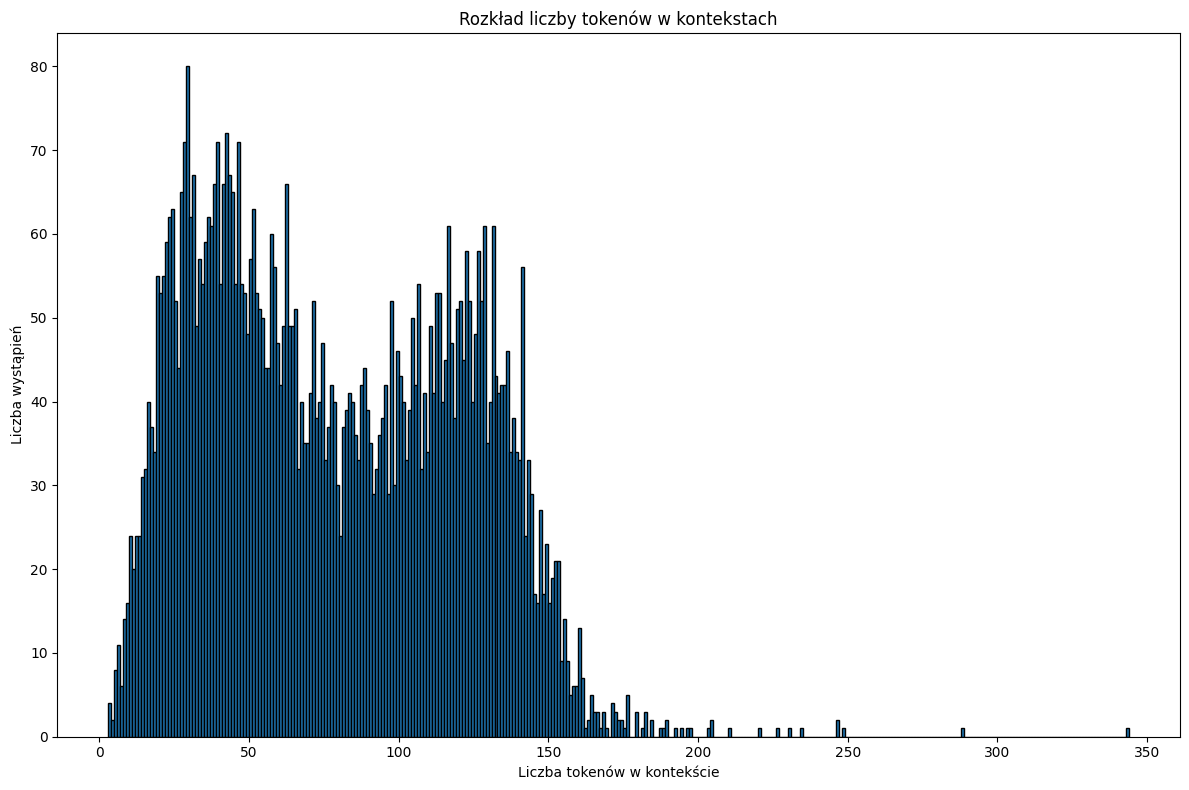

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = relevant_test_df["passage_text_token_count"].value_counts().reset_index()

# Create DataFrame
df = pd.DataFrame(data)

# Plot the histogram
plt.figure(figsize=(12, 8))
plt.hist(df['passage_text_token_count'], weights=df['count'], bins=range(min(df['passage_text_token_count']), max(df['passage_text_token_count']) + 1), edgecolor='black')

# Set axis labels and title
plt.xlabel("Liczba tokenów w kontekście")
plt.ylabel("Liczba wystąpień")
plt.title("Rozkład liczby tokenów w kontekstach")

# Display the plot
plt.tight_layout()
plt.show()


In [78]:
filtered_passages_ids = relevant_test_df["passage_id"].values

In [80]:
passage_df = process_jsonl_to_df(config=config, filtered_passages_ids=filtered_passages_ids, save_path=root_path / "data" / "test_relevant_passages.csv")